# **📊 분류 모델 성능 평가 지표 정리**

## **🔍 0. 혼동 행렬 (Confusion Matrix)**
|
모든 성능 지표는 이 표에서 출발합니다:

|                       | 예측 Positive | 예측 Negative |
|-----------------------|----------------|----------------|
| 실제 Positive         | True Positive (TP) | False Negative (FN) |
| 실제 Negative         | False Positive (FP) | True Negative (TN) |
---

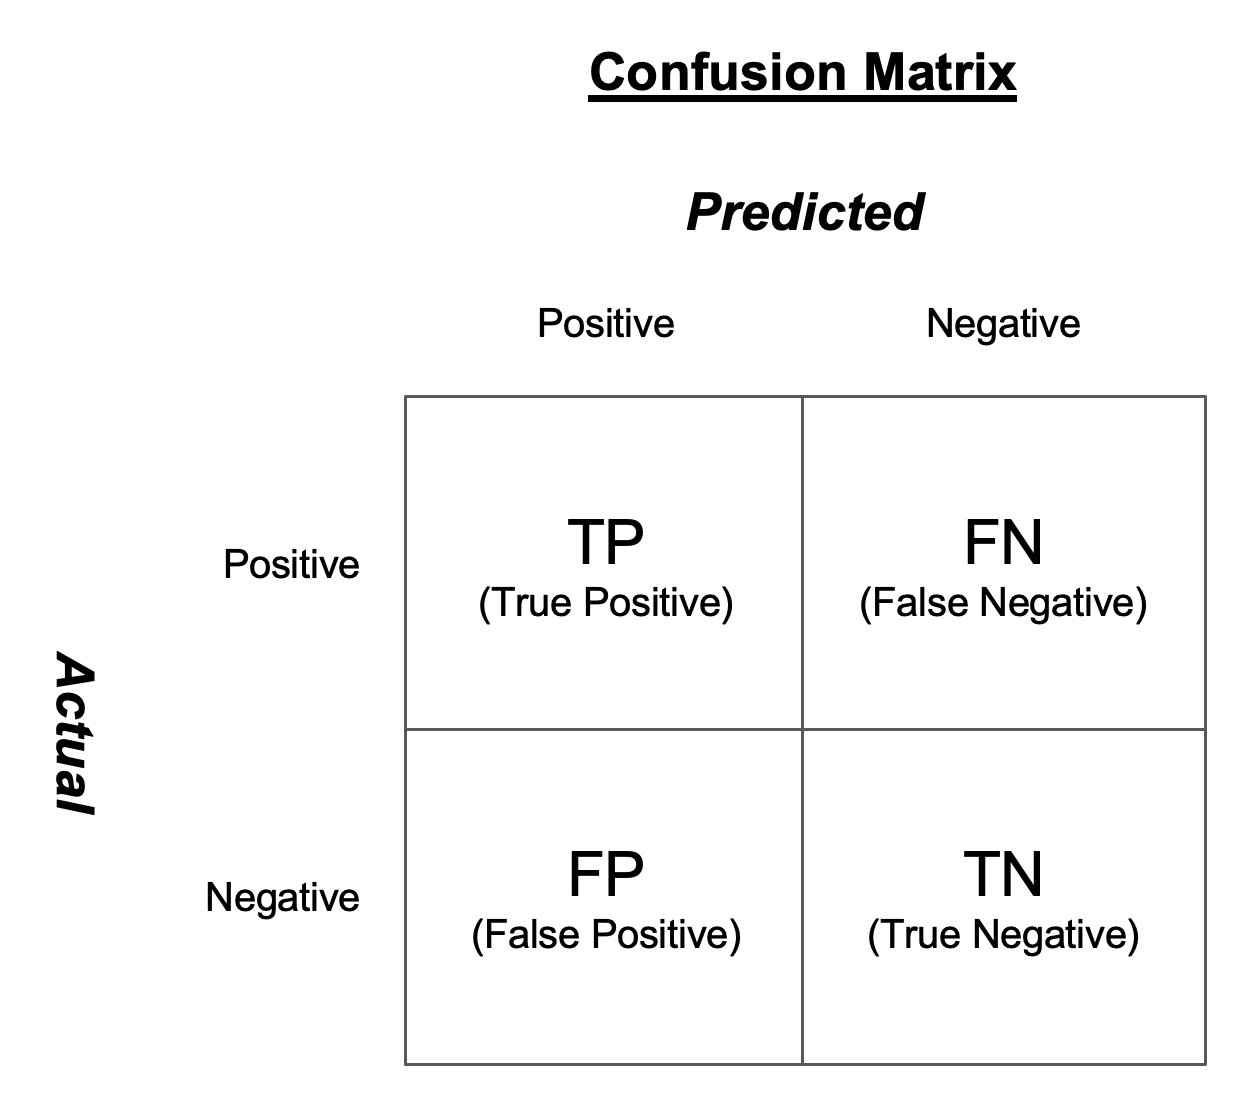

## **✅ 0. Accuracy (정확도)**

- **정의**: 전체 예측 중에서 **정답으로 맞춘 비율**입니다. 가장 직관적이고 흔히 사용하는 지표입니다.

- **공식**: Accuracy = (TP + TN) / (TP + FP + FN + TN)

## **✅ 1. Precision (정밀도)**

- **정의**: Positive라고 예측한 것 중 실제 Positive의 비율  
- **공식**: Precision = TP / (TP + FP)
- - **예시**: 10명을 감염자라고 예측했는데, 실제로는 7명이 진짜 감염자라면 → Precision = 0.7
---

## **✅ 2. Recall / Sensitivity / TPR (재현율, 민감도)**

- **정의**: 실제 Positive인 것 중 모델이 올바르게 Positive라고 예측한 비율입니다.  
- **공식**: Recall = TP / (TP + FN)  
- **예시**: 실제 감염자가 10명인데, 모델이 그중 7명을 감염자라고 예측했다면 Recall은 7 / 10 = 0.7입니다.
---

## **✅ 3. Specificity (특이도)**

- **정의**: 실제 Negative인 것 중 모델이 정확히 Negative라고 예측한 비율입니다.  
- **공식**: Specificity = TN / (TN + FP)  
- **예시**: 감염되지 않은 사람 100명 중 95명을 정확하게 음성으로 예측했다면 Specificity는 95 / 100 = 0.95입니다.
---

## **✅ 4. F1 Score**

- **정의**: Precision과 Recall의 조화 평균으로, 두 지표의 균형이 중요한 상황에서 유용합니다.  
- **공식**: F1 Score = 2 × (Precision × Recall) / (Precision + Recall)  
- **예시**: Precision이 0.8이고 Recall이 0.6이라면,  
  F1 Score는 2 × (0.8 × 0.6) / (0.8 + 0.6) = 0.6857입니다.
---

## **✅ 5. ROC Curve (Receiver Operating Characteristic Curve)**

- **정의**: 모델의 임계값(threshold)을 조정하면서 계산한 TPR(Recall)과 FPR(1 - Specificity)을 x, y축에 놓고 그린 곡선입니다.  
- **x축**: FPR = FP / (FP + TN)  
- **y축**: TPR = TP / (TP + FN)  
- ROC Curve는 모델이 다양한 조건에서 얼마나 잘 작동하는지를 시각적으로 보여줍니다.
---

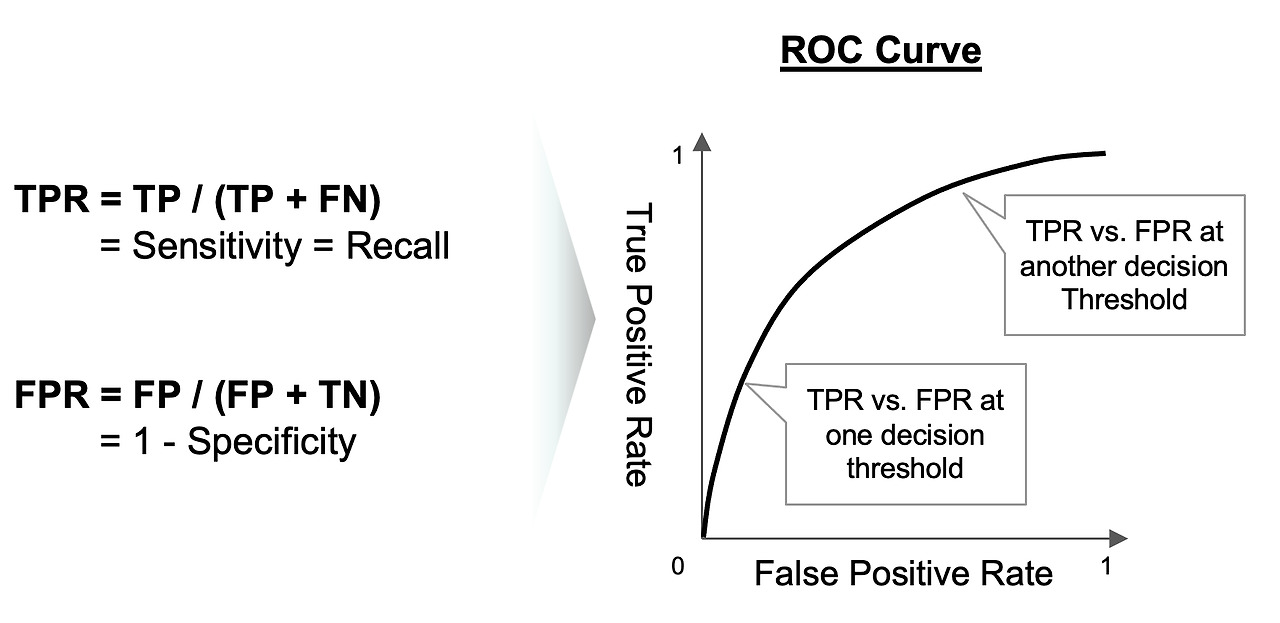

## **✅ 6. AUC (Area Under the Curve)**

- **정의**: ROC Curve 아래 면적을 의미하며, 모델의 전반적인 성능을 수치 하나로 표현합니다.  
- **값 해석**:  
  - AUC = 1.0이면 완벽한 분류기  
  - AUC = 0.5이면 랜덤한 분류 수준  
- AUC가 클수록 분류 성능이 좋은 모델입니다.
---

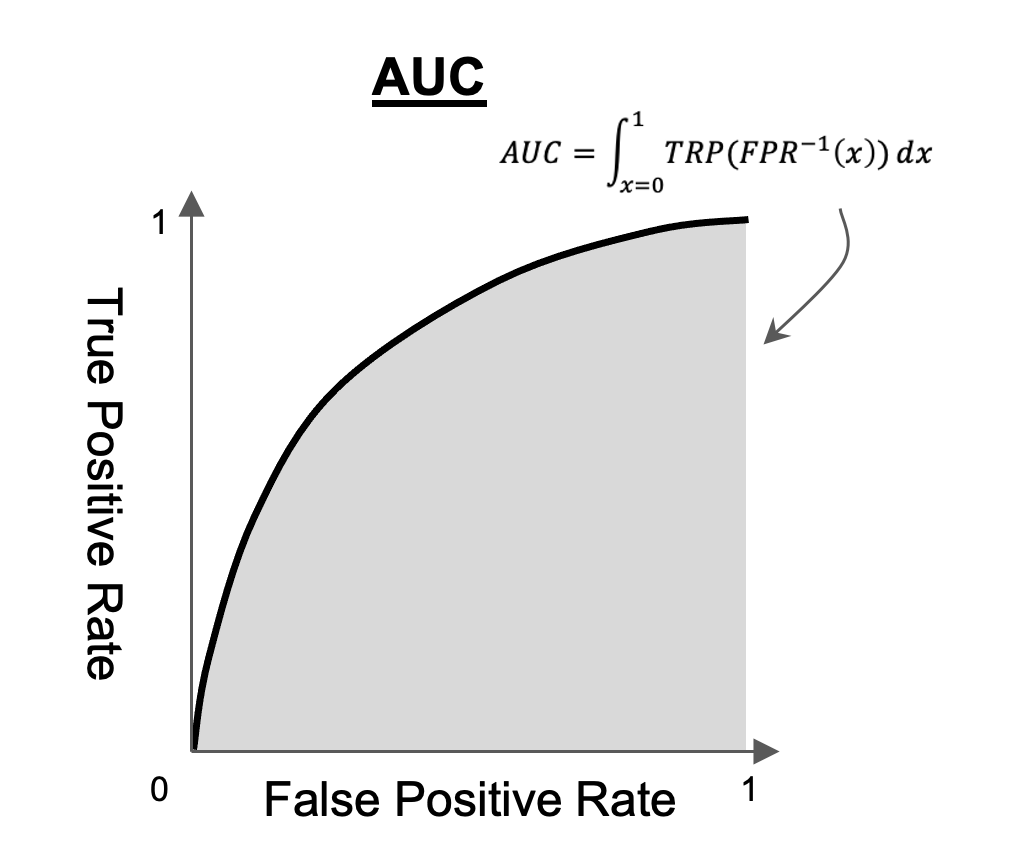

## **🔄 지표 요약 표**

| 지표         | 의미 요약                             | 공식                                |
|--------------|----------------------------------------|-------------------------------------|
| Precision    | 예측 Positive 중 실제 Positive 비율     | TP / (TP + FP)                      |
| Recall       | 실제 Positive 중 맞춘 비율              | TP / (TP + FN)                      |
| Sensitivity  | Recall과 동일                          | TP / (TP + FN)                      |
| Specificity  | 실제 Negative 중 맞춘 비율              | TN / (TN + FP)                      |
| F1 Score     | Precision & Recall의 조화 평균          | 2 × (P × R) / (P + R)               |
| ROC Curve    | TPR vs FPR 그래프                      | -                                   |
| AUC          | ROC Curve 아래 면적                    | -                                   |
---

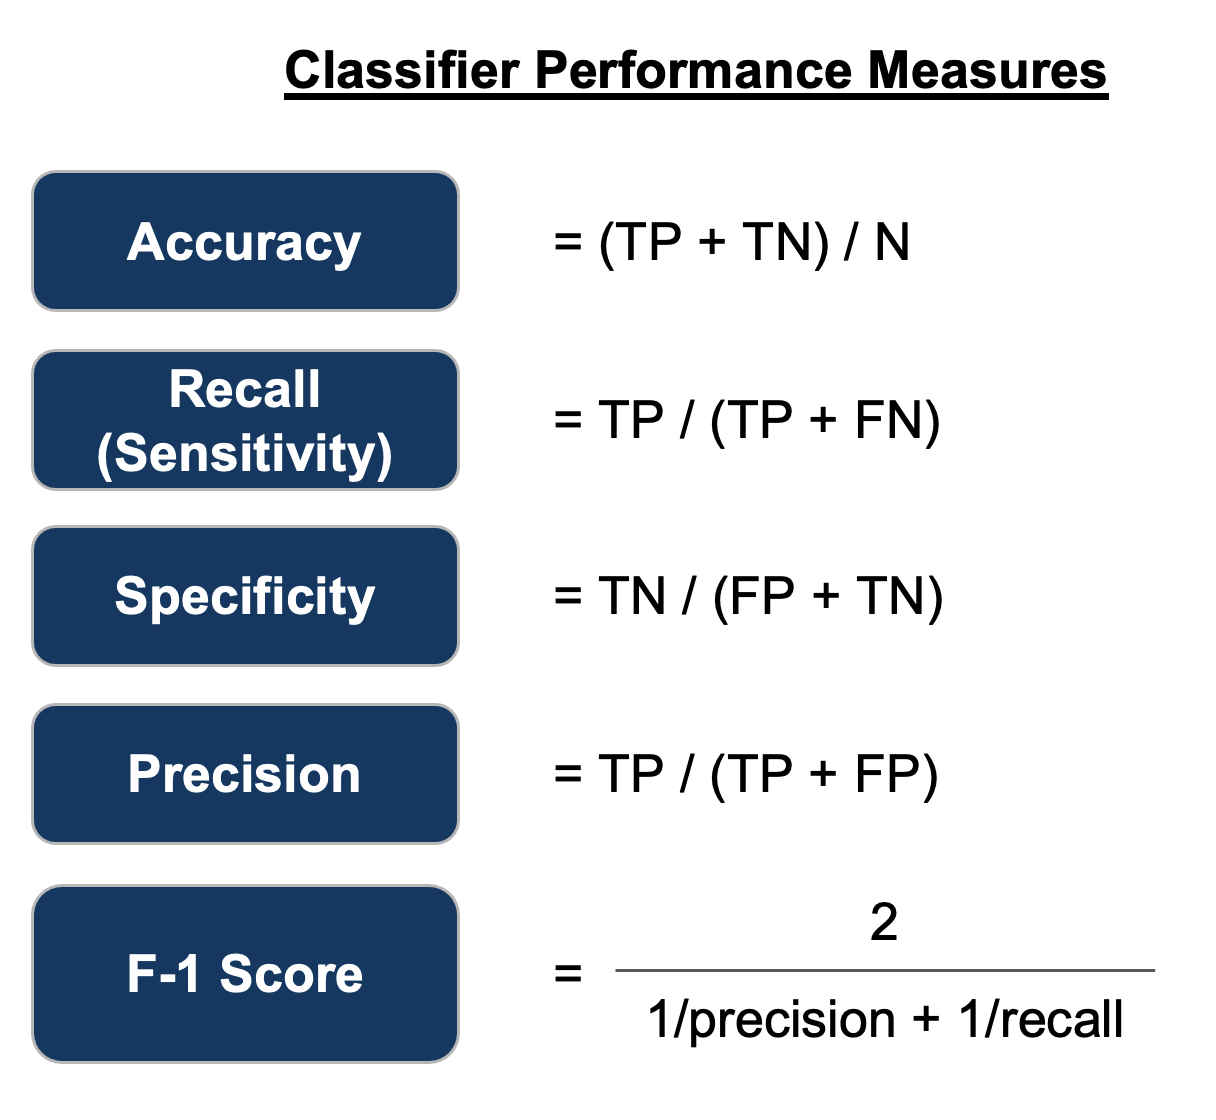

## **🧠 언제 어떤 지표를 써야 할까?**

| 상황 예시              | 중요 지표   | 이유 |
|------------------------|--------------|------|
| 스팸 필터              | Precision     | 정상 메일을 스팸으로 분류하면 곤란 |
| 암 진단                | Recall        | 환자를 놓치면 큰일 |
| 뉴스 분류, 감성 분석   | F1 Score      | Precision과 Recall이 모두 중요 |
| 전체 모델 성능 비교    | AUC           | threshold 변화에 상관없는 종합 성능 지표 |
---

# **✅ 시각화 코드 및 예시 정리**

## **<📊 Confusion Matrix 시각화>**

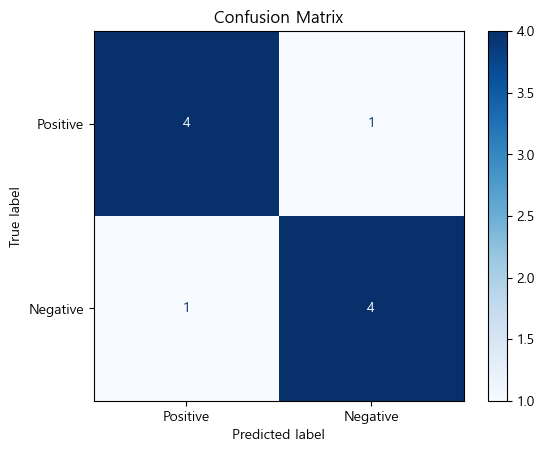

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 예시 데이터
y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]
y_pred = [1, 0, 1, 0, 0, 1, 0, 1, 1, 0]

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Positive", "Negative"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

## **<📶 Precision, Recall, Specificity, F1 Score 막대그래프>**

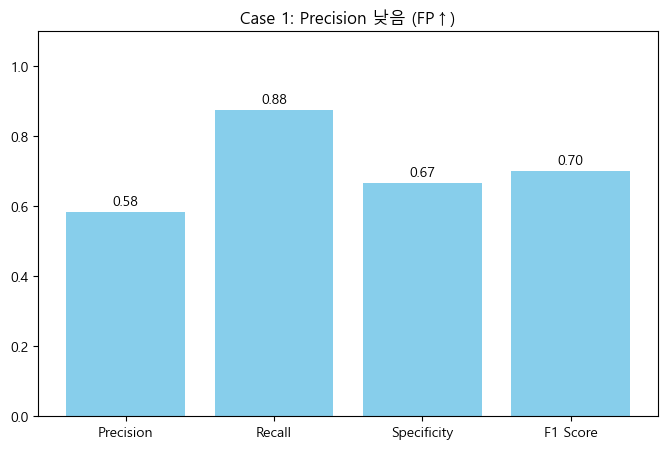

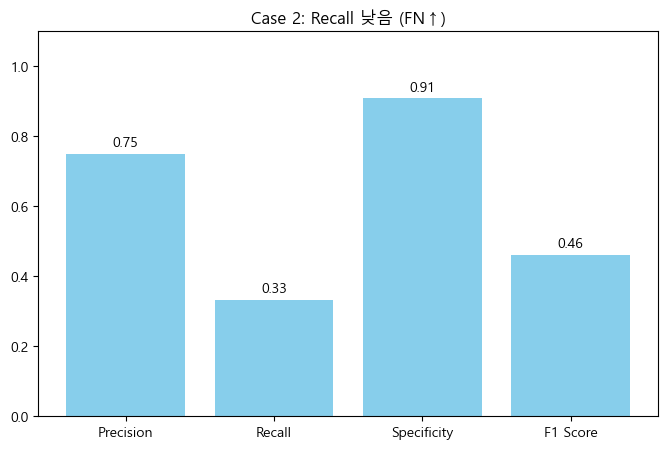

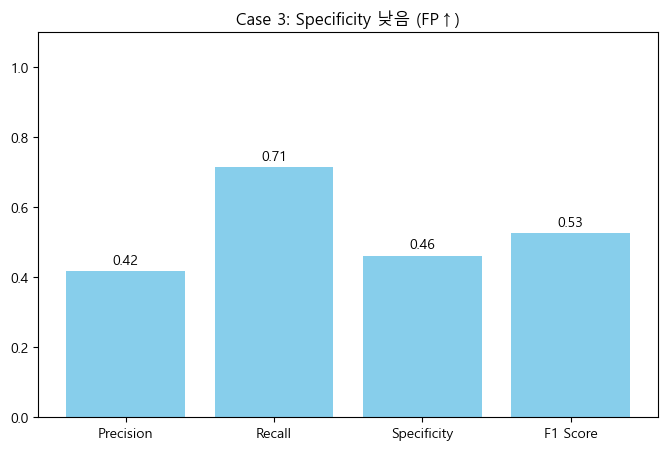

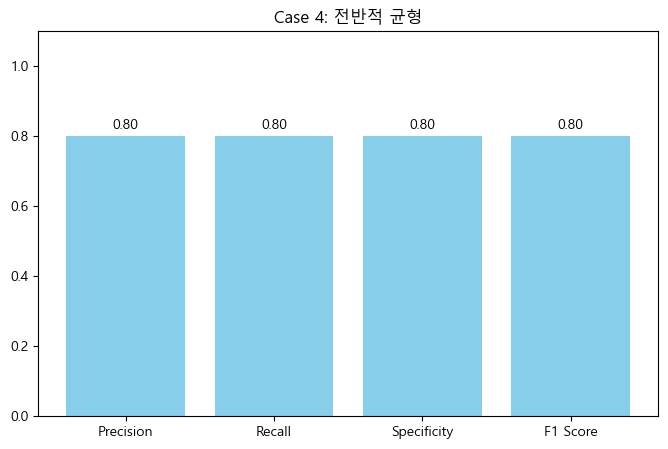

In [11]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 케이스 목록
cases = {
    "Case 1: Precision 낮음 (FP↑)": dict(TP=7, FP=5, FN=1, TN=10),
    "Case 2: Recall 낮음 (FN↑)": dict(TP=3, FP=1, FN=6, TN=10),
    "Case 3: Specificity 낮음 (FP↑)": dict(TP=5, FP=7, FN=2, TN=6),
    "Case 4: 전반적 균형": dict(TP=8, FP=2, FN=2, TN=8),
}

# 각 케이스에 대한 시각화
for title, values in cases.items():
    TP, FP, FN, TN = values["TP"], values["FP"], values["FN"], values["TN"]
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    specificity = TN / (TN + FP)
    f1 = 2 * (precision * recall) / (precision + recall)

    labels = ['Precision', 'Recall', 'Specificity', 'F1 Score']
    scores = [precision, recall, specificity, f1]

    plt.figure(figsize=(8, 5))
    bars = plt.bar(labels, scores, color='skyblue')
    plt.ylim(0, 1.1)
    plt.title(f"{title}")
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.02, f"{height:.2f}", ha='center')
    plt.show()


## **<📈 ROC Curve + AUC 시각화>**

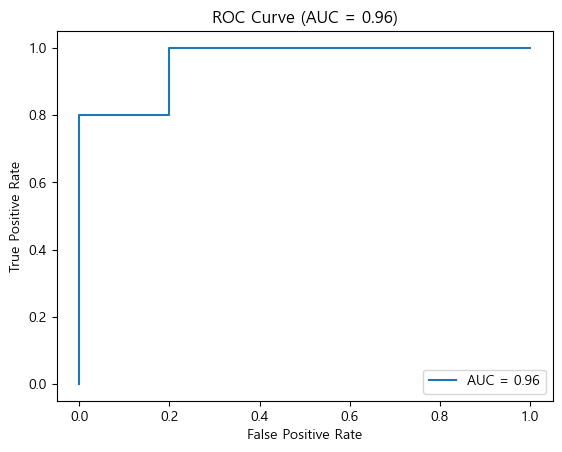

In [12]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# 예측 점수 (확률 기반)
y_scores = [0.9, 0.1, 0.8, 0.3, 0.2, 0.75, 0.1, 0.65, 0.85, 0.05]

fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.title(f"ROC Curve (AUC = {roc_auc:.2f})")
plt.show()
